___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import scipy.stats as stats
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')
# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
# pd.set_option('display.float_format', lambda x: '%.6f'%x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

#### Load Dataset

In [305]:
df_origin = pd.read_csv('Mall_Customers.csv',index_col="CustomerID")
df = df_origin.copy()
df.sample(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
83,Male,67,54,41
77,Female,45,54,53
146,Male,28,77,97


#### Explore Data

You can rename columns to more usable, if you need.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [117]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [118]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [119]:
df.duplicated().sum()

0

In [120]:
df.isna().sum().sum()

0

In [121]:
def check_missing(dataframe):  
    df_ = dataframe.copy()
    missing = pd.DataFrame({'feature': [i for i in df_.columns if df_[i].isnull().any()],
                            'n_missing': [df_[i].isnull().sum() for i in df_.columns  if df_[i].isnull().sum() != 0],
                            'missing_rate': [df_[i].isnull().sum() / df_.shape[0] 
                                             for i in df_.columns if df_[i].isnull().sum() != 0]})
    if missing.shape[0] == 0:
        print('No missing values')
    else:
        missing = missing.reset_index(drop = True)
        missing = missing.sort_values('n_missing', ascending = False)
        return missing

In [122]:
check_missing(df)

No missing values


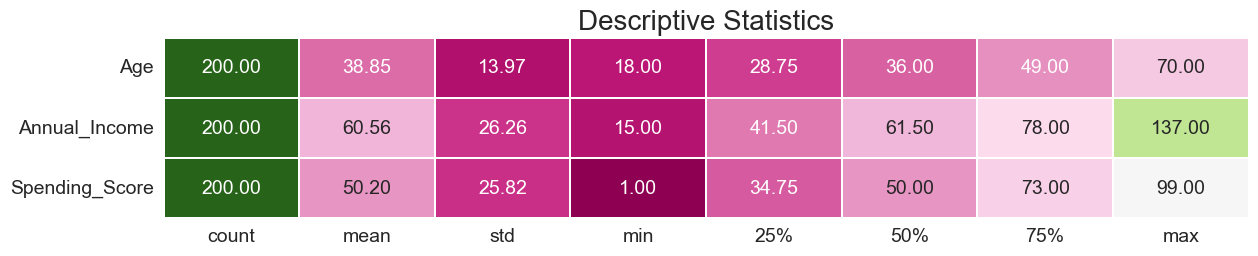

In [123]:
def desc_stats(dataframe, title = None):
    desc = df.describe(include='number').T
    f,ax = plt.subplots(figsize=(14, desc.shape[0]*0.78))
    sns.heatmap(desc,
                annot =True,
                cmap = 'PiYG',
                 fmt= '.2f',
                 ax = ax,
                linecolor = 'white',
                linewidths = 1.35,   
               cbar = False,
              annot_kws = {"size": 14})
    plt.xticks(size = 14)
    plt.yticks(size = 14,
               rotation = 0)
    if title == None:
        title = 'Descriptive Statistics'
    plt.title(title, size = 20)
    plt.show()
desc_stats(df)

In [124]:
df.describe().T.style.background_gradient(cmap='PiYG',axis=1)

,count,mean,std,min,25%,50%,75%,max
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual_Income,200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending_Score,200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [125]:
df.groupby("Gender")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.00,38.10,12.64,18.00,29.00,35.00,47.50,68.00
Male,88.00,39.81,15.51,18.00,27.75,37.00,50.50,70.00


In [126]:
df.groupby("Gender")["Annual_Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.00,59.25,26.01,16.00,39.75,60.00,77.25,126.00
Male,88.00,62.23,26.64,15.00,45.50,62.50,78.00,137.00


In [127]:
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value


In [128]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
])


,skew,kurtosis
Age,0.49,-0.67
Annual_Income,0.32,-0.10
Spending_Score,-0.05,-0.83


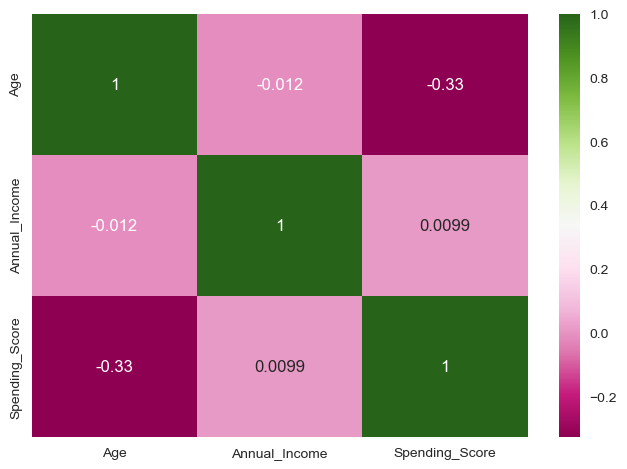

In [129]:
sns.heatmap(df.corr(),annot=True,cmap='PiYG')
plt.show()

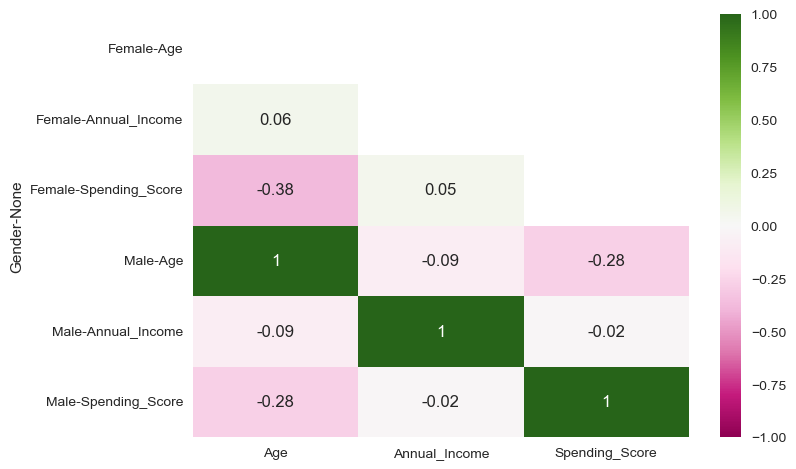

In [130]:
sns.heatmap(
    df.groupby('Gender').corr().round(2), 
    mask=np.triu(np.ones_like(df.groupby('Gender').corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1,cmap='PiYG'
)
plt.show()

Text(0, 0.5, 'Count')

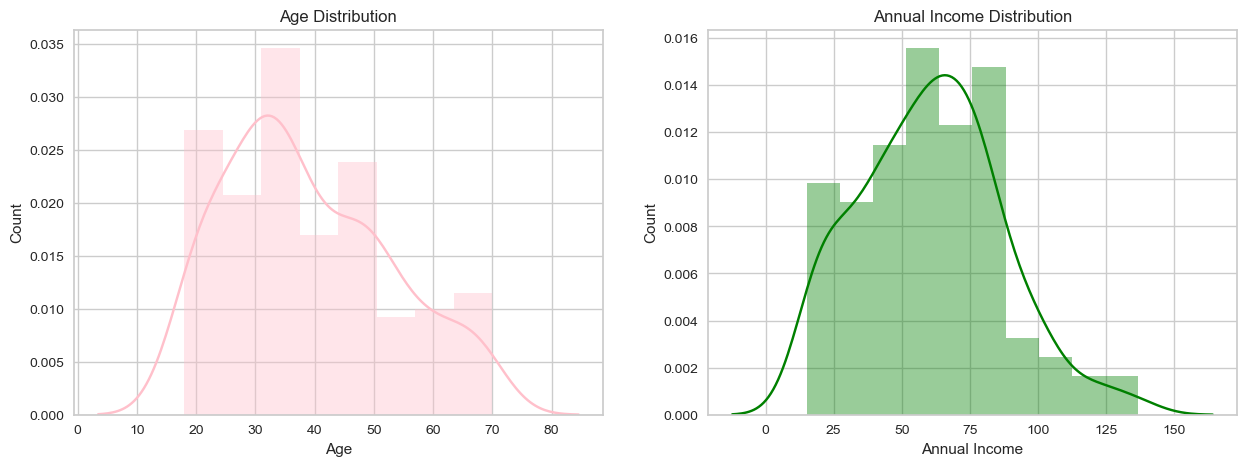

In [131]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(df['Age'],color='pink')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(df['Annual_Income'],color='green')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

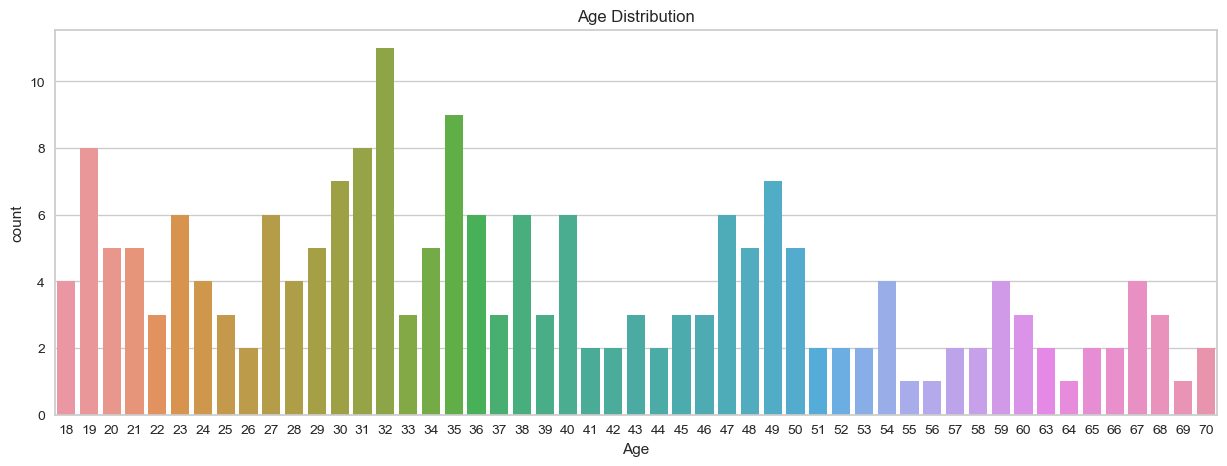

In [132]:
plt.figure(figsize=(15,5))
sns.countplot(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

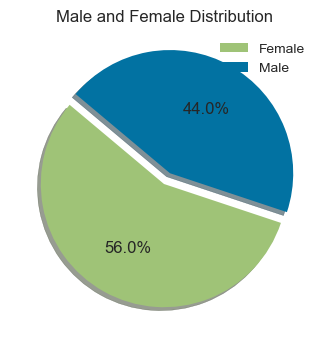

In [133]:
plt.figure(figsize=(4,4))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140,colors='gb')
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

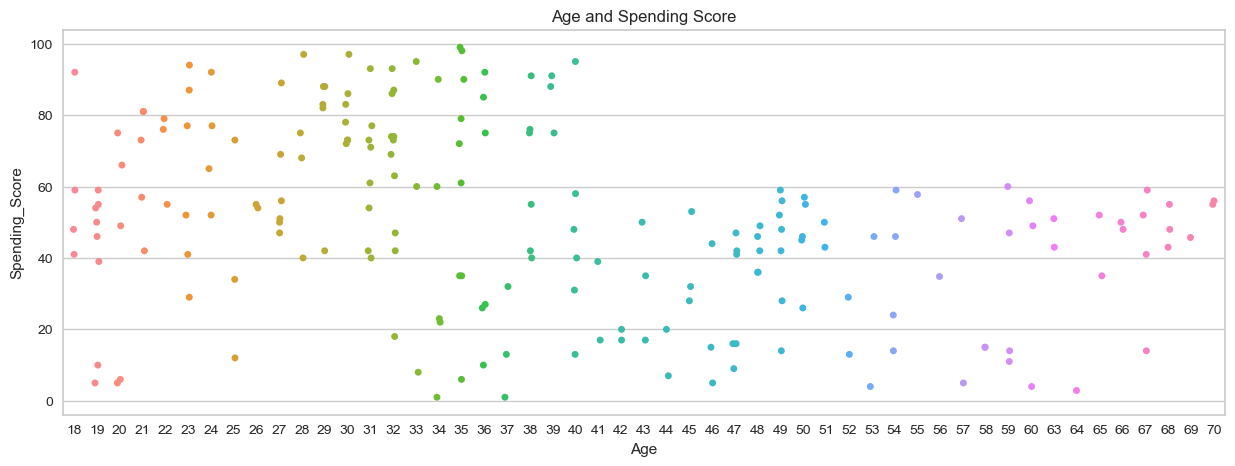

In [134]:
plt.figure(figsize=(15,5))
sns.stripplot(x=df['Age'], y=df['Spending_Score'])
plt.title('Age and Spending Score')
plt.show()

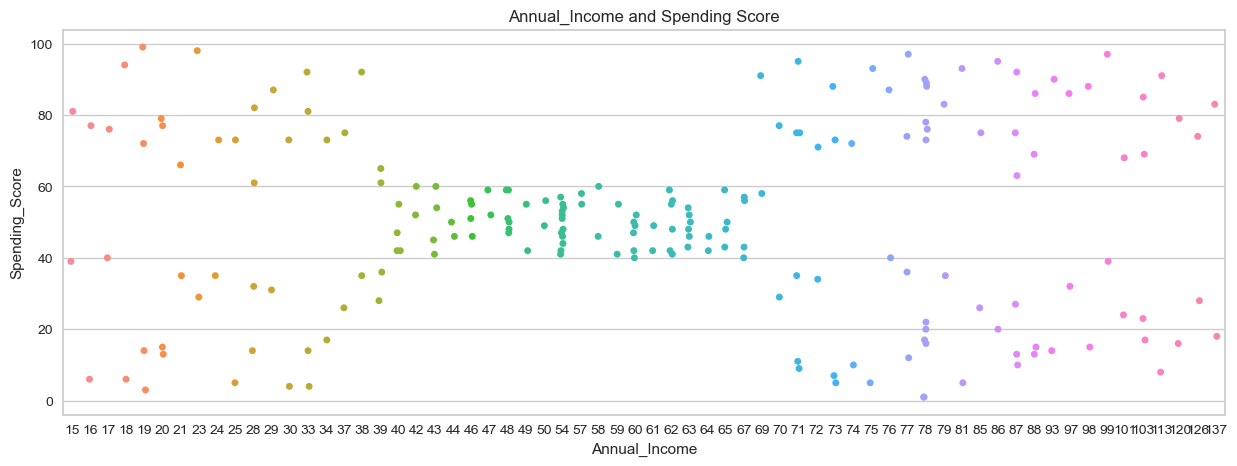

In [135]:
plt.figure(figsize=(15,5))
sns.stripplot(df["Annual_Income"], df['Spending_Score'])
plt.title('Annual_Income and Spending Score')
plt.show()

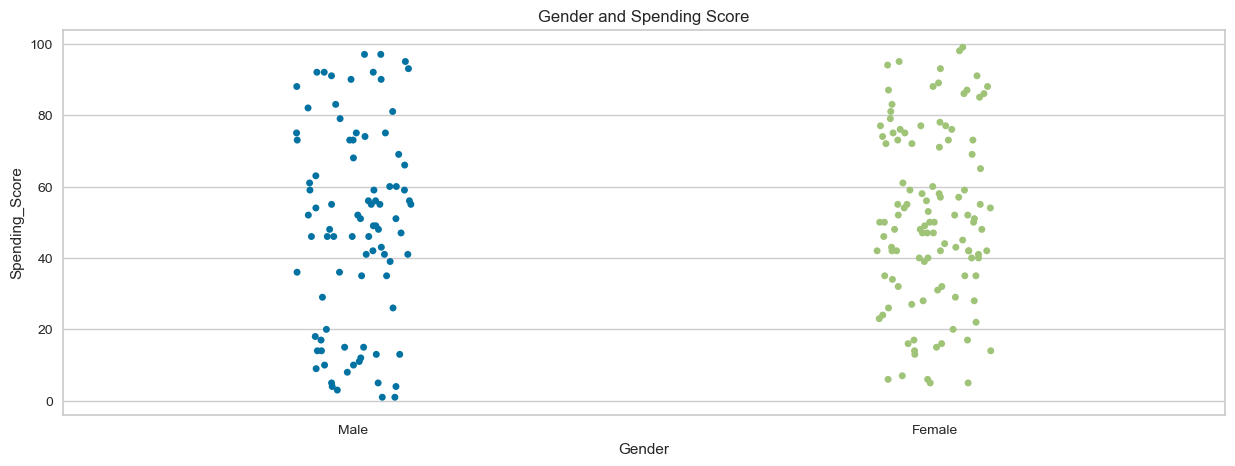

In [136]:
plt.figure(figsize=(15,5))
sns.stripplot(df['Gender'], df['Spending_Score'])
plt.title('Gender and Spending Score')
plt.show()

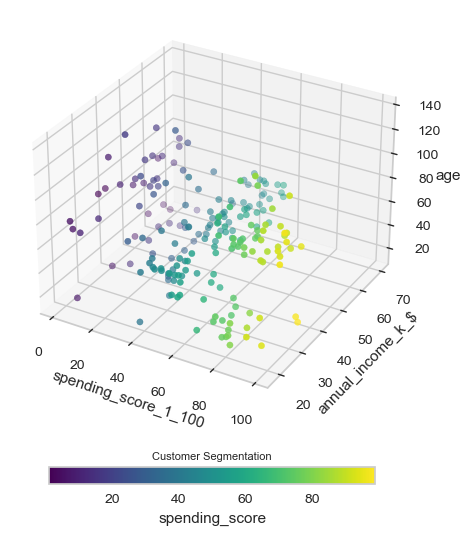

In [137]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['Spending_Score'], df['Age'], df['Annual_Income'], 
    c=df['Spending_Score'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('spending_score_1_100')
ax.set_ylabel('annual_income_k_$')
ax.set_zlabel('age')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='spending_score',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

In [138]:
numeric = df.select_dtypes('number').columns
numeric

Index(['Age', 'Annual_Income', 'Spending_Score'], dtype='object')

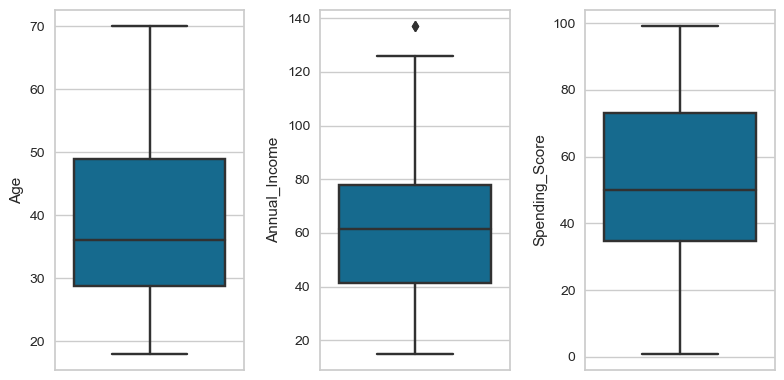

In [139]:
fig = plt.figure(figsize=(9, 2))
plt.subplots_adjust(
    left=0.1, right=0.9,
    top=1.9, bottom=0.1,
    wspace=0.4, hspace=0.25
)
for i, col in enumerate(numeric):
    plt.subplot(int(np.ceil(len(numeric)/3)), 3, i+1)
    sns.boxplot(y=col, data=df, whis=1.5)

plt.show()

In [234]:
df.Gender.replace("Male",0,inplace=True)
df.Gender.replace("Female",1,inplace=True)

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [235]:
#!pip install -U scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

In [236]:
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

#!pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

In [237]:
#pip list

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [238]:
from pyclustertend import hopkins

In [239]:
hopkins(df, df.shape[0]) 

0.2676992619342758

In [240]:
df[["Age",'Spending_Score']]

,Age,Spending_Score
CustomerID,,
1,-1.42,-0.43
2,-1.28,1.20
3,-1.35,-1.72
4,-1.14,1.04
5,-0.56,-0.40
...,...,...
196,-0.28,1.12
197,0.44,-0.86
198,-0.49,0.92


In [241]:
X = df[["Age",'Spending_Score']]
X

,Age,Spending_Score
CustomerID,,
1,-1.42,-0.43
2,-1.28,1.20
3,-1.35,-1.72
4,-1.14,1.04
5,-0.56,-0.40
...,...,...
196,-0.28,1.12
197,0.44,-0.86
198,-0.49,0.92


In [242]:
hopkins(X, X.shape[0])   #0.5 den düşük olan değerler biizm için iyi

0.28643370483373226

In [243]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from pyclustertend import hopkins


In [244]:
df.select_dtypes(include='number').columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [245]:
numbers = df.select_dtypes(include='number').columns
print(f'{"Not Scaled":<16}:', hopkins(df[numbers], df[numbers].shape[0]), hopkins(df[numbers], df[numbers].shape[0]//2))

for scaler in [StandardScaler(), MinMaxScaler(), RobustScaler()]:
    scaled = scaler.fit_transform(df[numbers])
    print(f'{f"{scaler}":<16}:',hopkins(scaled, scaled.shape[0]), hopkins(scaled, scaled.shape[0]//2))

Not Scaled      : 0.27374463207921546 0.2575116605267709
StandardScaler(): 0.2571210150560535 0.2897851793372859
MinMaxScaler()  : 0.2029615545203003 0.20610502568417105
RobustScaler()  : 0.27502632828926726 0.2907798536862613


In [246]:
# scaled df
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

numbers = df.select_dtypes(include='number').columns
df[numbers] = scaler.fit_transform(df[numbers])
df


,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,-1.13,-1.42,-1.74,-0.43
2,-1.13,-1.28,-1.74,1.20
3,0.89,-1.35,-1.70,-1.72
4,0.89,-1.14,-1.70,1.04
5,0.89,-0.56,-1.66,-0.40
...,...,...,...,...
196,0.89,-0.28,2.27,1.12
197,0.89,0.44,2.50,-0.86
198,-1.13,-0.49,2.50,0.92


In [247]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler


cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=StandardScaler()
                                )

In [248]:
from sklearn.cluster import KMeans

kmeans_model=KMeans()
pipe_kmeans = Pipeline([
    ('OneHotEncoder',column_trans),
    ('kmeans', kmeans_model)
])
pipe_kmeans.fit_predict(X)
# pipe_kmeans['kmeans'].labels_

array([0, 3, 5, 3, 0, 3, 5, 2, 6, 3, 6, 2, 6, 3, 5, 3, 1, 3, 6, 2, 1, 3,
       6, 3, 6, 2, 1, 3, 1, 2, 6, 3, 6, 2, 6, 3, 1, 3, 1, 3, 7, 2, 4, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 7, 4, 4, 4, 7, 0, 4, 7, 0, 7, 4, 7, 0,
       4, 7, 0, 0, 7, 4, 7, 7, 7, 0, 4, 4, 0, 4, 7, 4, 7, 4, 0, 4, 4, 0,
       3, 4, 7, 0, 4, 1, 0, 0, 4, 0, 4, 0, 0, 4, 7, 0, 4, 0, 7, 4, 7, 7,
       7, 0, 1, 0, 0, 0, 7, 4, 4, 4, 0, 1, 4, 2, 0, 3, 1, 2, 6, 3, 6, 3,
       0, 3, 5, 2, 6, 3, 5, 3, 6, 2, 0, 2, 5, 2, 4, 3, 1, 2, 1, 2, 1, 3,
       6, 2, 5, 3, 5, 3, 4, 2, 5, 2, 6, 3, 1, 2, 1, 3, 1, 3, 5, 2, 6, 2,
       6, 3, 6, 2, 1, 2, 6, 2, 1, 2, 6, 3, 1, 2, 1, 3, 5, 2, 6, 3, 1, 3,
       5, 2])

#### *ii. Determine optimal number of clusters*

In [249]:
# sum squared distance
ssd = [] 

K = range(2,10)

for k in K:
    kmeans_model = KMeans(
                            n_clusters =k, 
                            random_state=42
                            )
    pipe_kmeans = Pipeline([
                            ('OneHotEncoder',column_trans),
                            ('kmeans', kmeans_model)
                            ])

    pipe_kmeans.fit(X)
    # intertia: Distance from each sample to centroid of its cluster
    ssd.append(pipe_kmeans['kmeans'].inertia_)

In [250]:
ssd

[189.38749033992428,
 124.32628617921529,
 89.76521676586151,
 71.29556592219441,
 53.17373745380917,
 46.44628500949163,
 39.30587325192688,
 33.83644725407148]

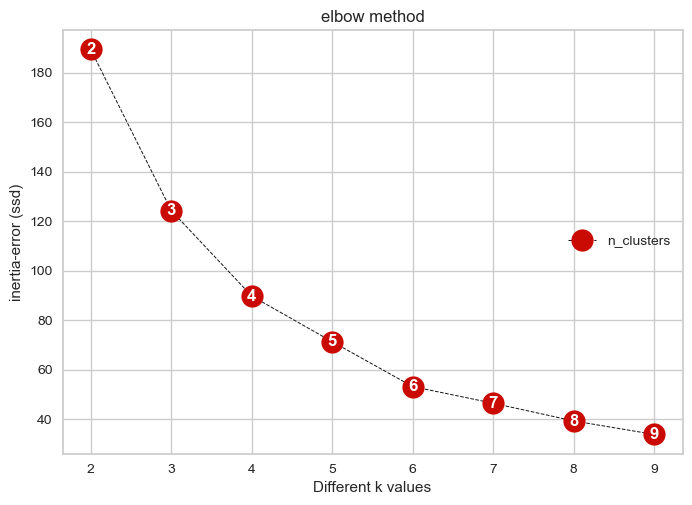

In [251]:
plt.plot(
    K, ssd, 
    color='k', ls='--', lw=0.7,
    marker='o', mfc='r', ms=16,
    label='n_clusters'
)
for x, y in zip(K, ssd):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 
plt.legend(loc='center right')
plt.show();

In [252]:
df_diff = pd.DataFrame(ssd, index=K, columns=['forward_diff']).diff(-1)
df_diff

,forward_diff
2,65.06
3,34.56
4,18.47
5,18.12
6,6.73
7,7.14
8,5.47
9,NaN


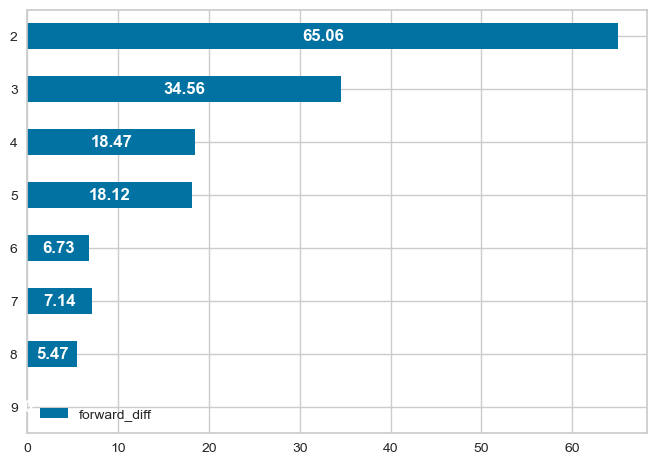

In [253]:
g = df_diff.round(2).plot.barh(rot=0)
g.bar_label(g.containers[0], weight='bold', label_type='center', color='w')
g.invert_yaxis()
plt.show()

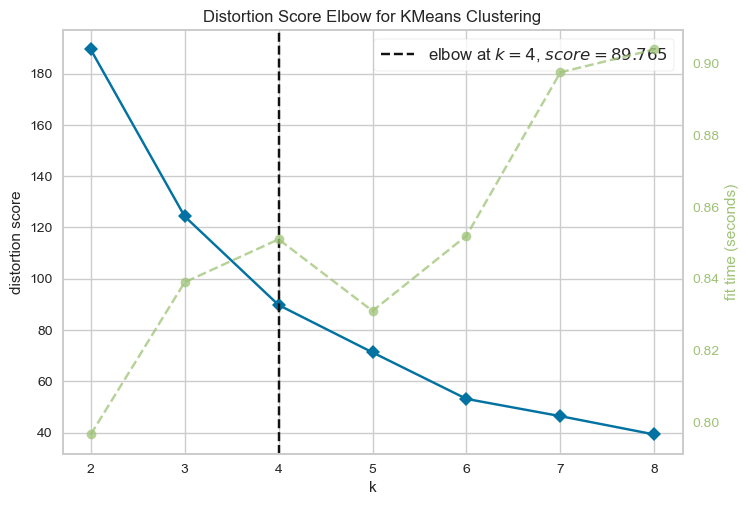

In [254]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(
    random_state=42
)
visualizer = KElbowVisualizer(model, k=(2,9))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

### Why silhouette_score is negative?

In [255]:
from sklearn.metrics import silhouette_score

In [256]:
silhouette_score(X, pipe_kmeans['kmeans'].labels_)

0.4230225675097125

In [257]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47212716430695223
For n_clusters=3, the silhouette score is 0.4395299000230284
For n_clusters=4, the silhouette score is 0.4383860846564478
For n_clusters=5, the silhouette score is 0.4236911130700454
For n_clusters=6, the silhouette score is 0.4566283030238572
For n_clusters=7, the silhouette score is 0.4114882432131885
For n_clusters=8, the silhouette score is 0.418072410371193


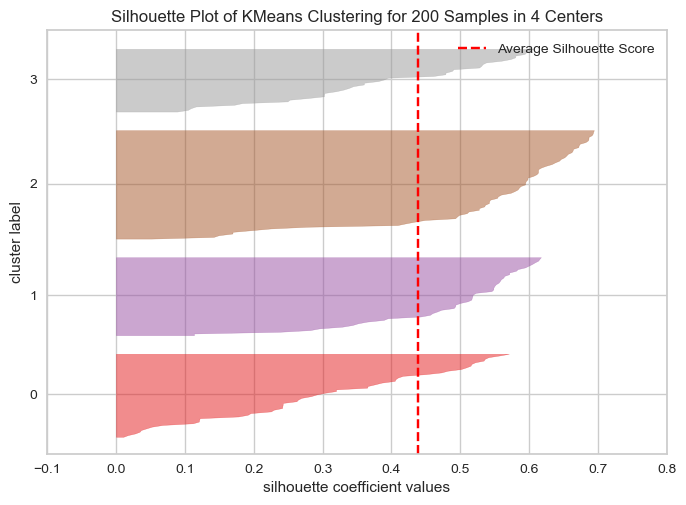

In [258]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [259]:
kmeans_model=KMeans(n_clusters=4, random_state=42)
pipe_kmeans = Pipeline([
    ('OneHotEncoder',column_trans),
    ('kmeans', kmeans_model)
])
pipe_kmeans.fit(X)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

#### *iv. Visualizing and Labeling All the Clusters*

In [260]:
pipe_kmeans['kmeans'].labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

In [261]:
X["Cluster"] =pipe_kmeans['kmeans'].labels_

In [262]:
X["Cluster"].value_counts()

2    65
0    50
1    47
3    38
Name: Cluster, dtype: int64

In [263]:
X

,Age,Spending_Score,Cluster
CustomerID,,,
1,-1.42,-0.43,0
2,-1.28,1.20,2
3,-1.35,-1.72,0
4,-1.14,1.04,2
5,-0.56,-0.40,0
...,...,...,...
196,-0.28,1.12,2
197,0.44,-0.86,3
198,-0.49,0.92,2


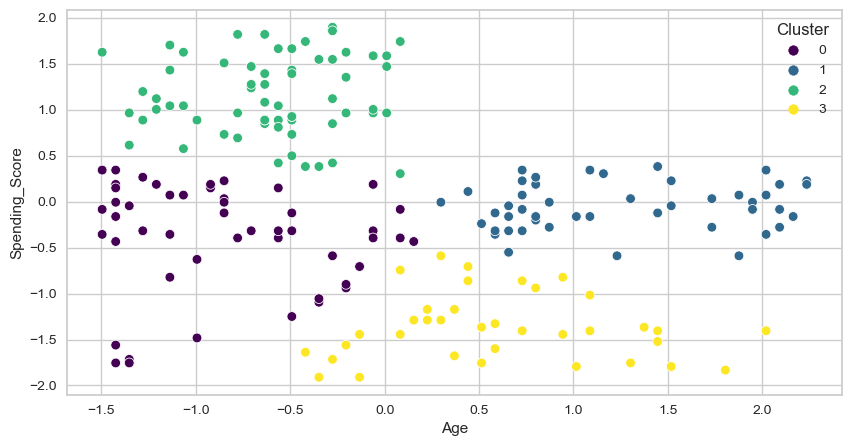

In [264]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["Age"], 
                X["Spending_Score"], hue= X.Cluster,palette= "viridis");

In [265]:
# scaled
centers = kmeans_model.cluster_centers_
pd.DataFrame(centers)


,0,1
0,-0.83,-0.39
1,1.23,-0.07
2,-0.61,1.15
3,0.63,-1.37


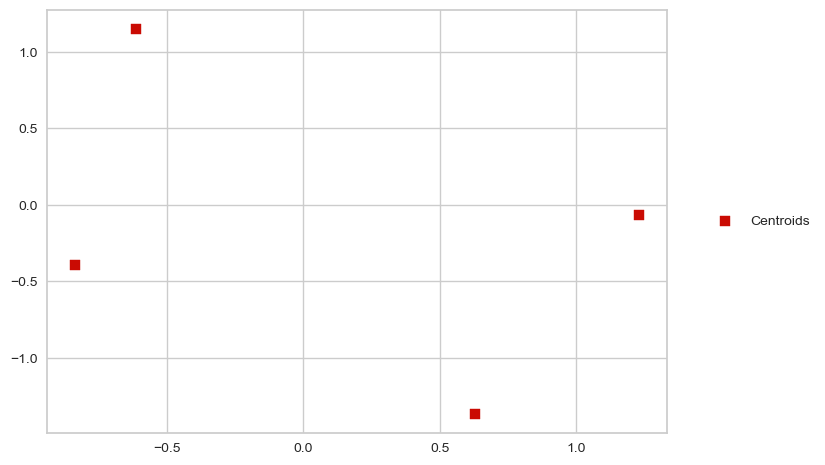

In [266]:
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids')
plt.legend(loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show();

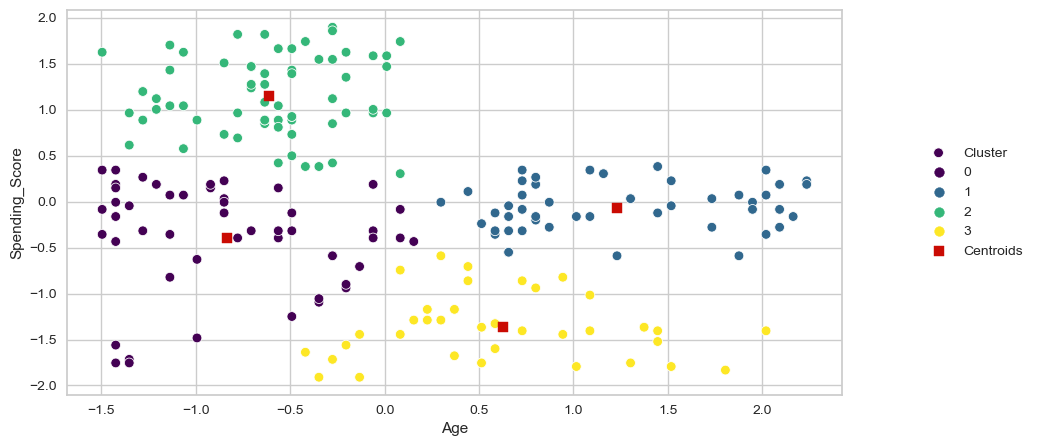

In [267]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x=X["Age"], y=X["Spending_Score"], 
    data=X, 
    hue= "Cluster", 
    palette= "viridis", 
    label='Cluster'
)
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids')
plt.legend(loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show();


In [268]:
Cluster_pred = X.groupby("Cluster").mean().T
Cluster_pred

Cluster,0,1,2,3
Age,-0.83,1.23,-0.61,0.63
Spending_Score,-0.39,-0.07,1.15,-1.37


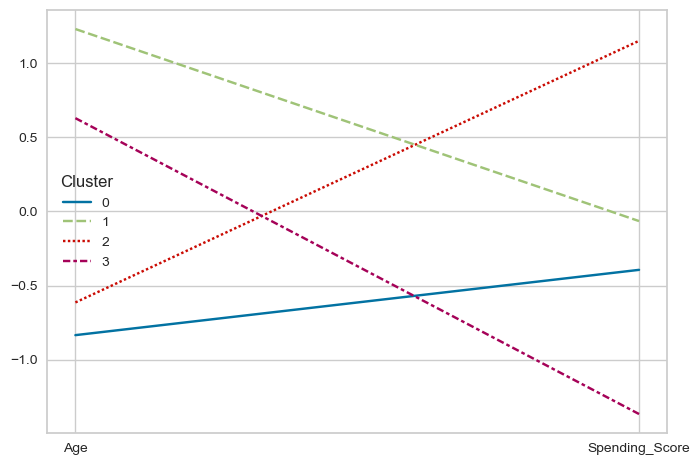

In [269]:
sns.lineplot(data=Cluster_pred)
plt.show();

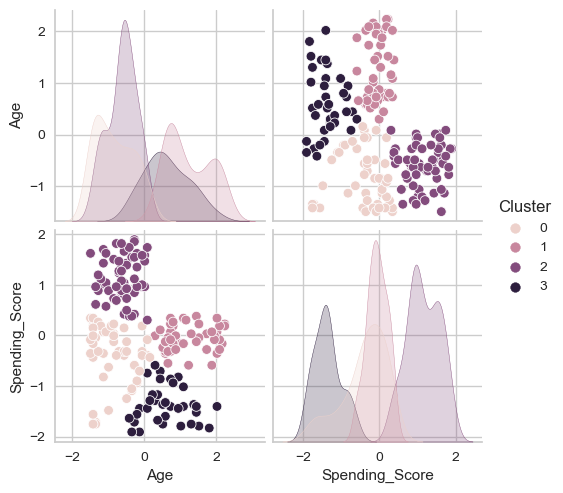

In [270]:
sns.pairplot(data=X,hue="Cluster")

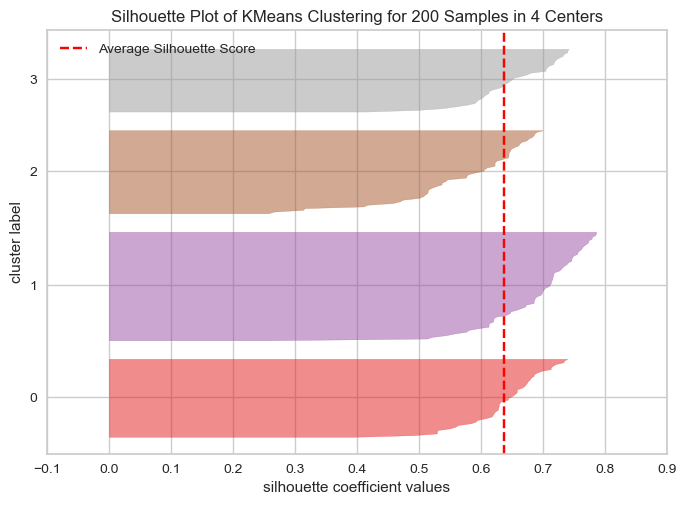

In [271]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
kmeans_model=KMeans(n_clusters=4, random_state=42)
model = Pipeline([
    ('OneHotEncoder',column_trans),
    ('kmeans', kmeans_model)
])
visualizer = SilhouetteVisualizer(model['kmeans'])

visualizer.fit(model['OneHotEncoder'].fit_transform(X))    # Fit the data to the visualizer
visualizer.poof();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [272]:
X = df[["Annual_Income",'Spending_Score']]
X

,Annual_Income,Spending_Score
CustomerID,,
1,-1.74,-0.43
2,-1.74,1.20
3,-1.70,-1.72
4,-1.70,1.04
5,-1.66,-0.40
...,...,...
196,2.27,1.12
197,2.50,-0.86
198,2.50,0.92


In [273]:
hopkins(X, X.shape[0])   #0.5 den düşük olan değerler biizm için iyi

0.310326830702145

In [274]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler


cat = X.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=StandardScaler()
                                )

In [275]:
from sklearn.cluster import KMeans

kmeans_model=KMeans()
pipe_kmeans = Pipeline([
    ('OneHotEncoder',column_trans),
    ('kmeans', kmeans_model)
])
pipe_kmeans.fit_predict(X)
# pipe_kmeans['kmeans'].labels_

array([5, 2, 6, 2, 5, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 5, 2, 5, 2, 5, 2,
       6, 2, 6, 2, 5, 2, 5, 2, 6, 2, 6, 2, 6, 2, 6, 2, 5, 2, 5, 2, 5, 1,
       5, 2, 1, 5, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 4, 0, 4, 0, 4, 0, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7,
       4, 7])

#### *ii. Determine optimal number of clusters*

In [180]:
# sum squared distance
ssd = [] 

K = range(2,10)

for k in K:
    kmeans_model = KMeans(
                            n_clusters =k, 
                            random_state=42
                            )
    pipe_kmeans = Pipeline([
                            ('OneHotEncoder',column_trans),
                            ('kmeans', kmeans_model)
                            ])

    pipe_kmeans.fit(X)
    # intertia: Distance from each sample to centroid of its cluster
    ssd.append(pipe_kmeans['kmeans'].inertia_)

In [181]:
ssd

[270.7042666430673,
 157.7040081503595,
 108.92131661364358,
 65.56840815571682,
 55.057348270386,
 44.91118554999016,
 37.73640346254162,
 32.37525368158287]

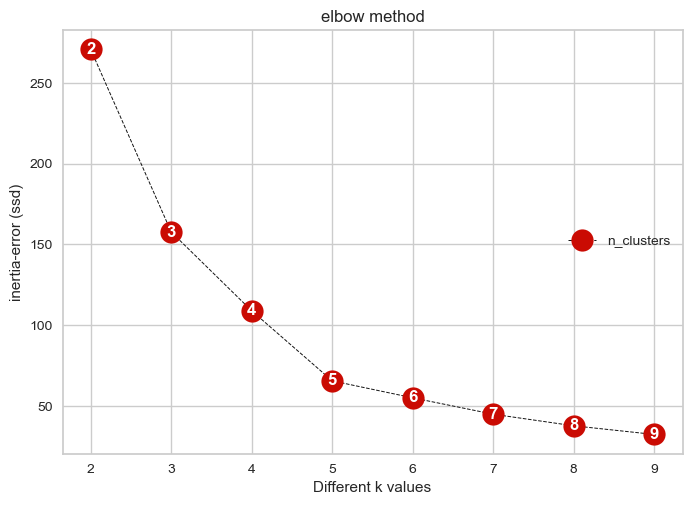

In [182]:
plt.plot(
    K, ssd, 
    color='k', ls='--', lw=0.7,
    marker='o', mfc='r', ms=16,
    label='n_clusters'
)
for x, y in zip(K, ssd):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 
plt.legend(loc='center right')
plt.show();

In [183]:
df_diff = pd.DataFrame(ssd, index=K, columns=['forward_diff']).diff(-1)
df_diff

,forward_diff
2,113.00
3,48.78
4,43.35
5,10.51
6,10.15
7,7.17
8,5.36
9,NaN


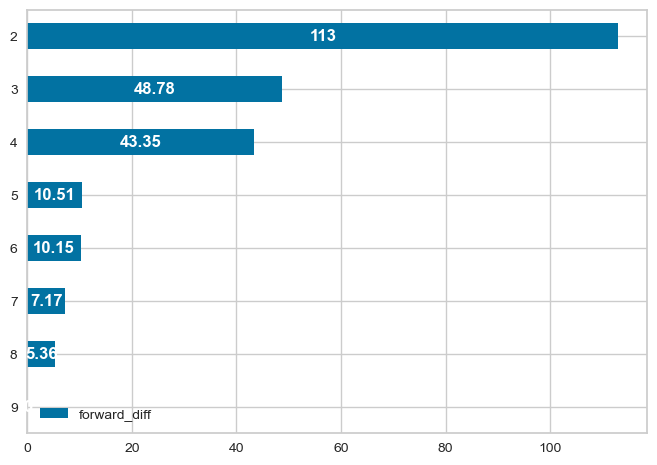

In [184]:
g = df_diff.round(2).plot.barh(rot=0)
g.bar_label(g.containers[0], weight='bold', label_type='center', color='w')
g.invert_yaxis()
plt.show()

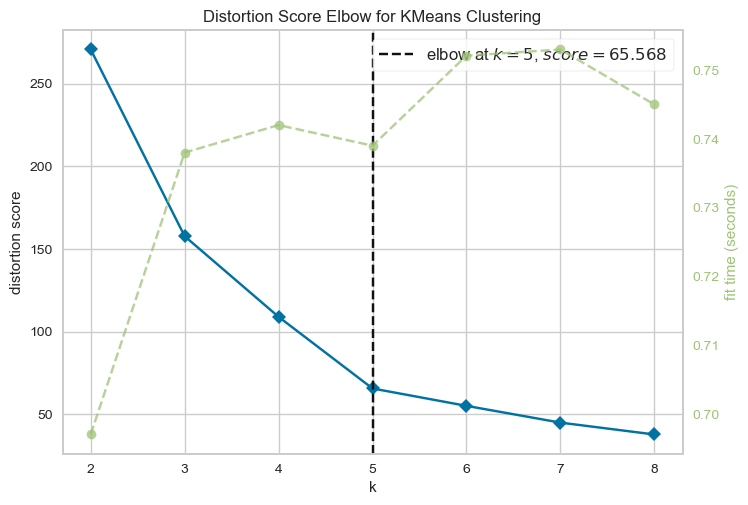

In [185]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(
    random_state=42
)
visualizer = KElbowVisualizer(model, k=(2,9))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

#### *iii. Apply K Means*

In [186]:
kmeans_model=KMeans(n_clusters=5, random_state=42)
pipe_kmeans = Pipeline([
    ('OneHotEncoder',column_trans),
    ('kmeans', kmeans_model)
])
pipe_kmeans.fit(X)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

#### *iv. Visualizing and Labeling All the Clusters*

In [187]:
pipe_kmeans['kmeans'].labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [188]:
X["Classes"] =pipe_kmeans['kmeans'].labels_

In [189]:
X["Classes"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Classes, dtype: int64

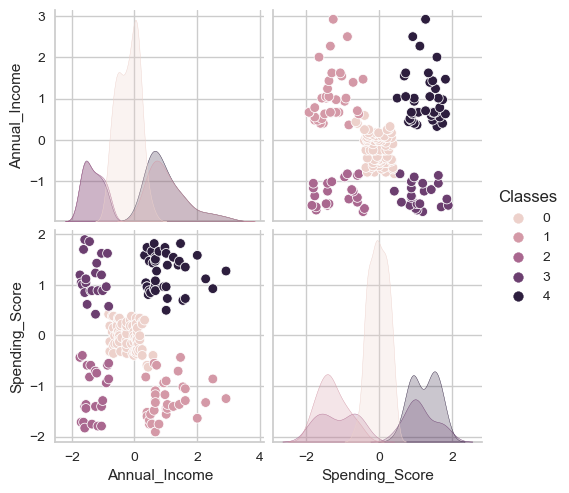

In [190]:
sns.pairplot(data=X,hue="Classes")

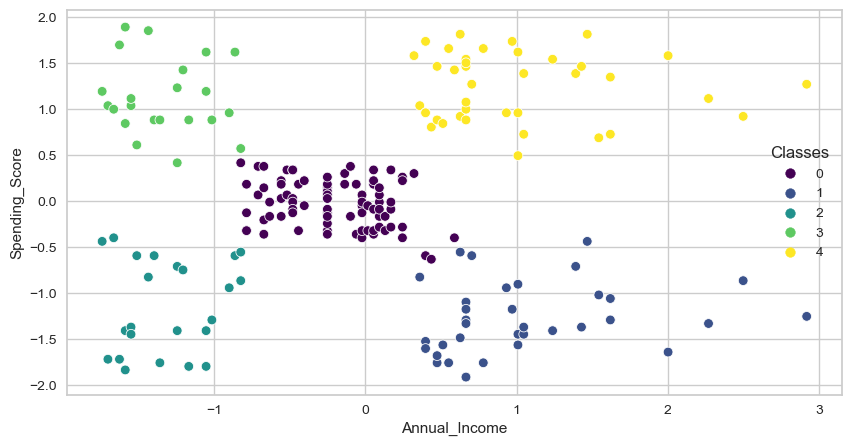

In [191]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["Annual_Income"], 
                X["Spending_Score"], hue= X["Classes"],palette= "viridis");

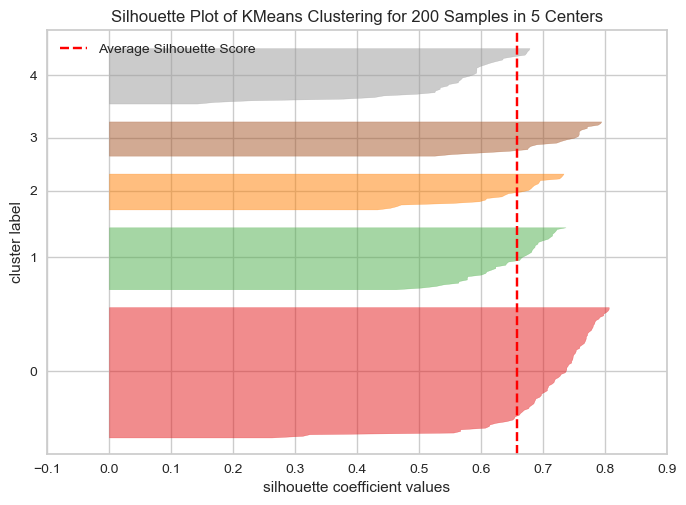

In [192]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
kmeans_model=KMeans(n_clusters=5, random_state=42)
model = Pipeline([
    ('OneHotEncoder',column_trans),
    ('kmeans', kmeans_model)
])
visualizer = SilhouetteVisualizer(model['kmeans'])

visualizer.fit(model['OneHotEncoder'].fit_transform(X))    # Fit the data to the visualizer
visualizer.poof();

### Hierarchical Clustering

In [193]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [276]:
X1 = df[["Age",'Spending_Score']]

In [277]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

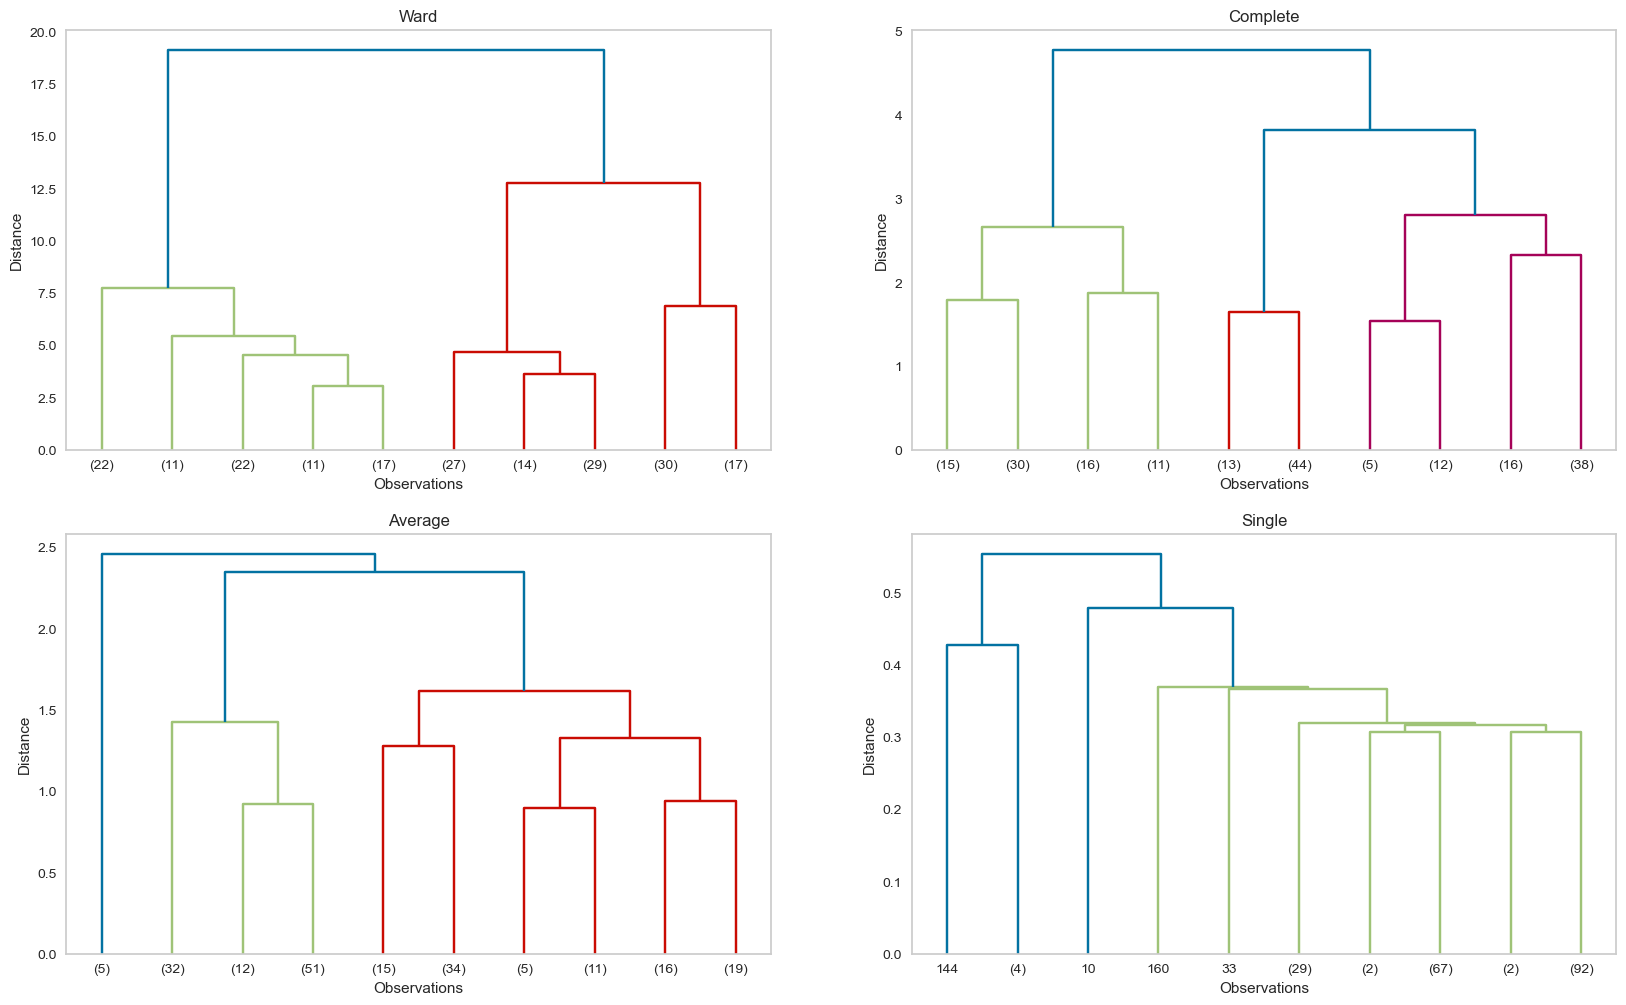

In [279]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

for i,j in enumerate(['ward', 'complete', 'average', 'single']):
    plt.subplot(221+i)
    plt.title(j.title())
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage(y=X1, method=j), leaf_font_size = 10, truncate_mode='lastp', p=10)  

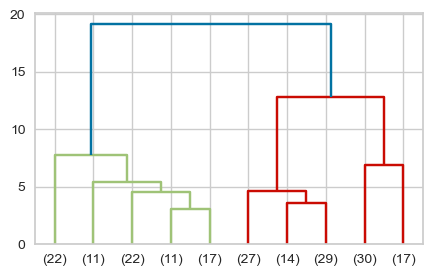

In [197]:
plt.figure(figsize = (5,3))
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [198]:
K = range(2,10)

for k in K:
    model1 = AgglomerativeClustering(n_clusters = k)
    model1.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model1.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268735984
Silhouette Score for 3 clusters: 0.41664148520394606
Silhouette Score for 4 clusters: 0.3892700489345869
Silhouette Score for 5 clusters: 0.3764554127950157
Silhouette Score for 6 clusters: 0.3990690566534328
Silhouette Score for 7 clusters: 0.3586046783668453
Silhouette Score for 8 clusters: 0.3610812833213386
Silhouette Score for 9 clusters: 0.365908374973662


In [199]:
from sklearn.cluster import AgglomerativeClustering

In [200]:
model1 = AgglomerativeClustering(n_clusters=3,affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int64)

In [314]:
 model1.labels_

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int64)

In [315]:
X1["clustr_1"]=model1.labels_

In [316]:
X1["clustr_1"].value_counts()

0    83
2    70
1    47
Name: clustr_1, dtype: int64

<AxesSubplot:title={'center':'Cluster Count'}, xlabel='clustr_1', ylabel='count'>

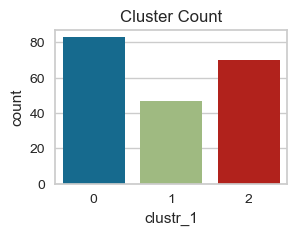

In [204]:
plt.figure(figsize = (3,2))
plt.title("Cluster Count")
sns.countplot(x = X1["clustr_1"])

### Clustering based on Annual Income and Spending Score- x2

In [205]:
X2 = df[["Annual_Income",'Spending_Score']]

In [206]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

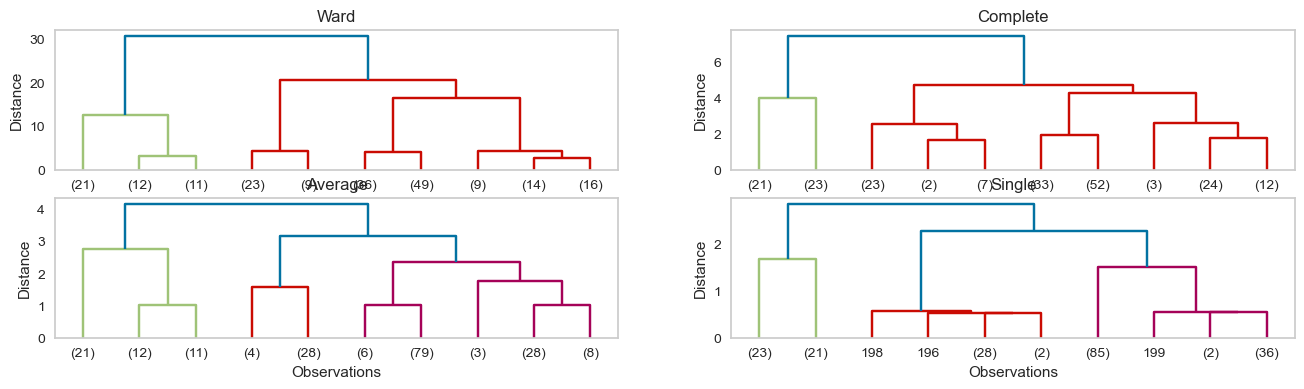

In [281]:
plt.figure(figsize = (16,4))
from scipy.cluster.hierarchy import linkage, dendrogram
sns.set_style("whitegrid", {'axes.grid' : False})

for i,j in enumerate(['ward', 'complete', 'average', 'single']):
    plt.subplot(221+i)
    plt.title(j.title())
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage(y=X2, method=j), leaf_font_size = 10, truncate_mode='lastp',p=10);

In [208]:
K = range(2,10)

for k in K:
    model2 = AgglomerativeClustering(n_clusters = k)
    model2.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model2.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


In [209]:
model2 = AgglomerativeClustering(n_clusters=5,affinity = "euclidean", linkage = "ward") #Silhouette Score for 5 clusters: 0.55 en yüksek
model2.fit(X2)

AgglomerativeClustering(n_clusters=5)

In [210]:
X2["cluster_2"] = model2.labels_

In [211]:
X2["cluster_2"].value_counts()

2    85
1    39
0    32
4    23
3    21
Name: cluster_2, dtype: int64

<AxesSubplot:title={'center':'Cluster Count'}, xlabel='cluster_2', ylabel='count'>

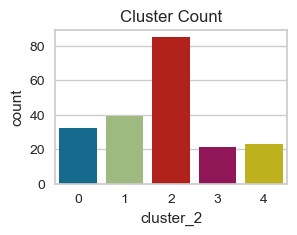

In [212]:
plt.figure(figsize = (3,2))
plt.title("Cluster Count")
sns.countplot(x = X2.cluster_2)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [319]:
model1 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
model1.fit(X1)
model1.labels_
X1['labels'] = model1.labels_
X1

,Age,Spending_Score,clustr_1,labels
CustomerID,,,,
1,-1.42,-0.43,1,1
2,-1.28,1.20,2,2
3,-1.35,-1.72,1,1
4,-1.14,1.04,2,2
5,-0.56,-0.40,1,1
...,...,...,...,...
196,-0.28,1.12,2,2
197,0.44,-0.86,0,0
198,-0.49,0.92,2,2


Text(0.5, 1.0, 'Predicted Clusters')

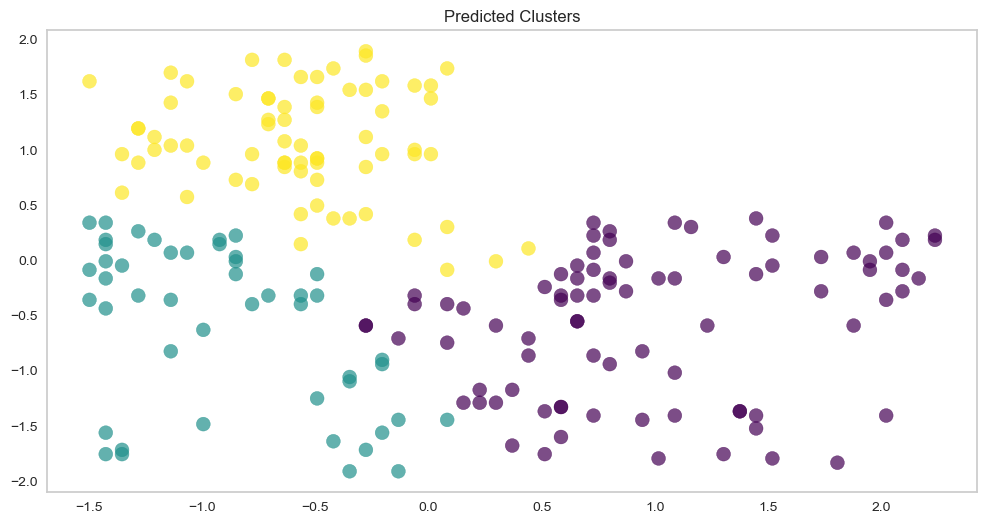

In [320]:
plt.figure(figsize=(12,6))
plt.scatter(X1["Age"], X1["Spending_Score"], c=X1['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")

#### Annual Income and Spending Score- x2

In [215]:
model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model2.fit(X2)
model2.labels_
X2['labels'] = model2.labels_
X2

,Annual_Income,Spending_Score,cluster_2,labels
CustomerID,,,,
1,-1.74,-0.43,4,3
2,-1.74,1.20,3,4
3,-1.70,-1.72,4,3
4,-1.70,1.04,3,4
5,-1.66,-0.40,4,3
...,...,...,...,...
196,2.27,1.12,1,2
197,2.50,-0.86,0,0
198,2.50,0.92,1,2


Text(0.5, 1.0, 'Predicted Clusters')

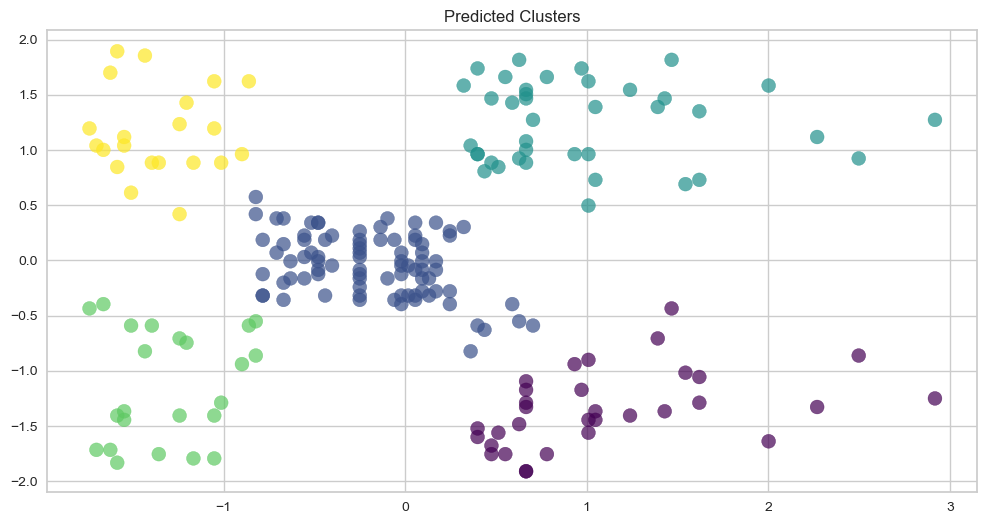

In [216]:
plt.figure(figsize=(12,6))
plt.scatter(X2["Annual_Income"], X2["Spending_Score"], c=X2['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")

#### Interpretation based on Age and Spending Score- x1

In [217]:
clustring_pred = X1.groupby("labels").mean().T
clustring_pred

labels,0,1,2
Age,0.99,-0.89,-0.57
Spending_Score,-0.57,-0.60,1.07
clustr_1,0.00,1.00,2.00


<AxesSubplot:>

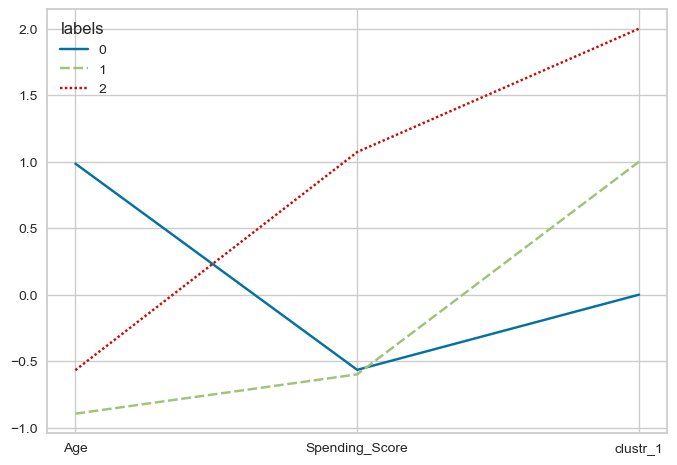

In [218]:
sns.lineplot(data=clustring_pred)

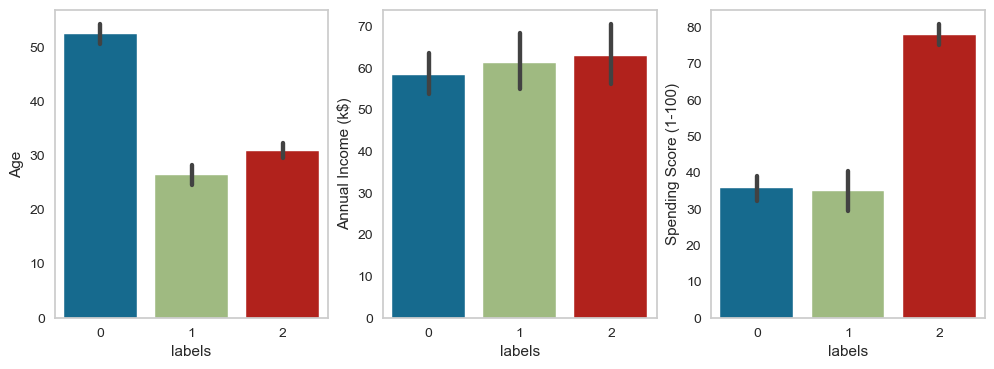

In [321]:
plt.figure(figsize=(12,4))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(1, 3, i+1) 
    sns.barplot(x=X1['labels'], y=col, data=df)

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [220]:
clustring_pred = X2.groupby("labels").mean().T
clustring_pred

labels,0,1,2,3,4
Annual_Income,1.10,-0.18,0.99,-1.31,-1.35
Spending_Score,-1.34,-0.04,1.24,-1.14,1.16
cluster_2,0.00,2.00,1.00,4.00,3.00


<AxesSubplot:>

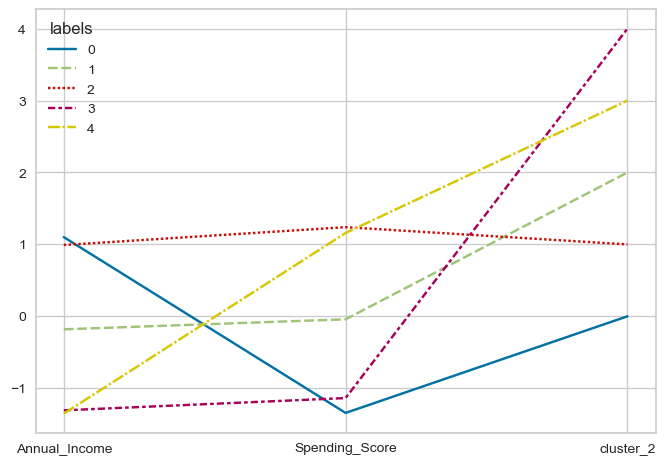

In [221]:
sns.lineplot(data=clustring_pred)

In [306]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


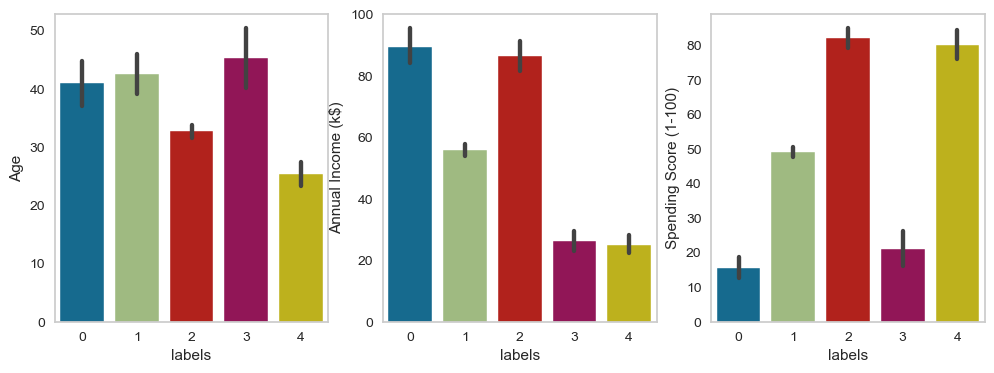

In [310]:
plt.figure(figsize=(12,4))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(1, 3, i+1) 
    sns.barplot(x=X2['labels'], y=col, data=df)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

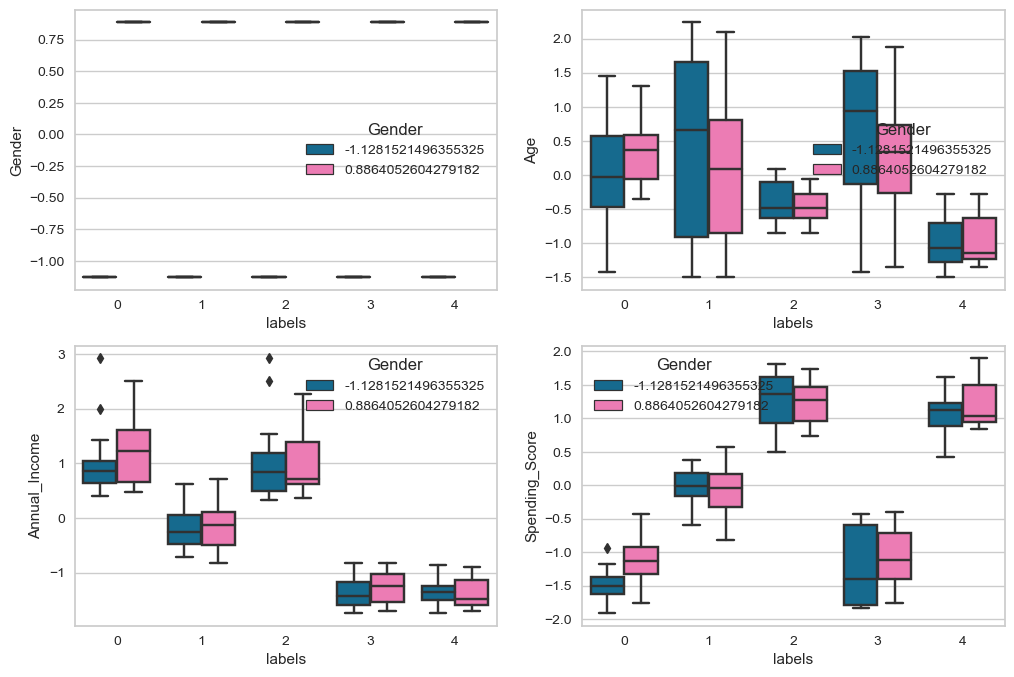

In [223]:
plt.figure(figsize=(12,8))

for i, col in enumerate(df.columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=X2['labels'], y=col, data=df, hue=df['Gender'], palette=['b', 'hotpink'])

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___